<a href="https://colab.research.google.com/github/ChiboromaW/SGA1_4/blob/main/Copy_of_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Chiboroma Worlu

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

In [2]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ',', '\t', etc

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of data: {data.shape}\n")
    return data

In [3]:
# Load data
fp = "salary.csv"
data = load_data(filename=fp)



Shape of data: (32560, 15)



> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [4]:
# Load data
fp = "salary.csv"
data = load_data(filename=fp)

data.head()

Shape of data: (32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
data.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Split the data into numeric and categorical data
num_data = data.select_dtypes(include=[int, float])
cat_data = data.select_dtypes(include=["O"])

num_data.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [11]:
# Making a count plot

def plot_(
    data: pd.DataFrame,
    features: list[str],
    rows_num: int,
    cols_num: int,
    figsize: tuple,
) -> "Plot":
    """This returns a count plot of all the categorical variables"""
    fig, axs = plt.subplots(rows_num, cols_num, figsize=figsize)

    for idx, feat in enumerate(data.columns):
        if rows_num > 1:
            ax = axs[(idx // cols_num), (idx % cols_num)]
        else:
            ax = axs[idx]

        sns.countplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")

        labels = sorted(data[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=70)

    fig.tight_layout()
    plt.show()

  

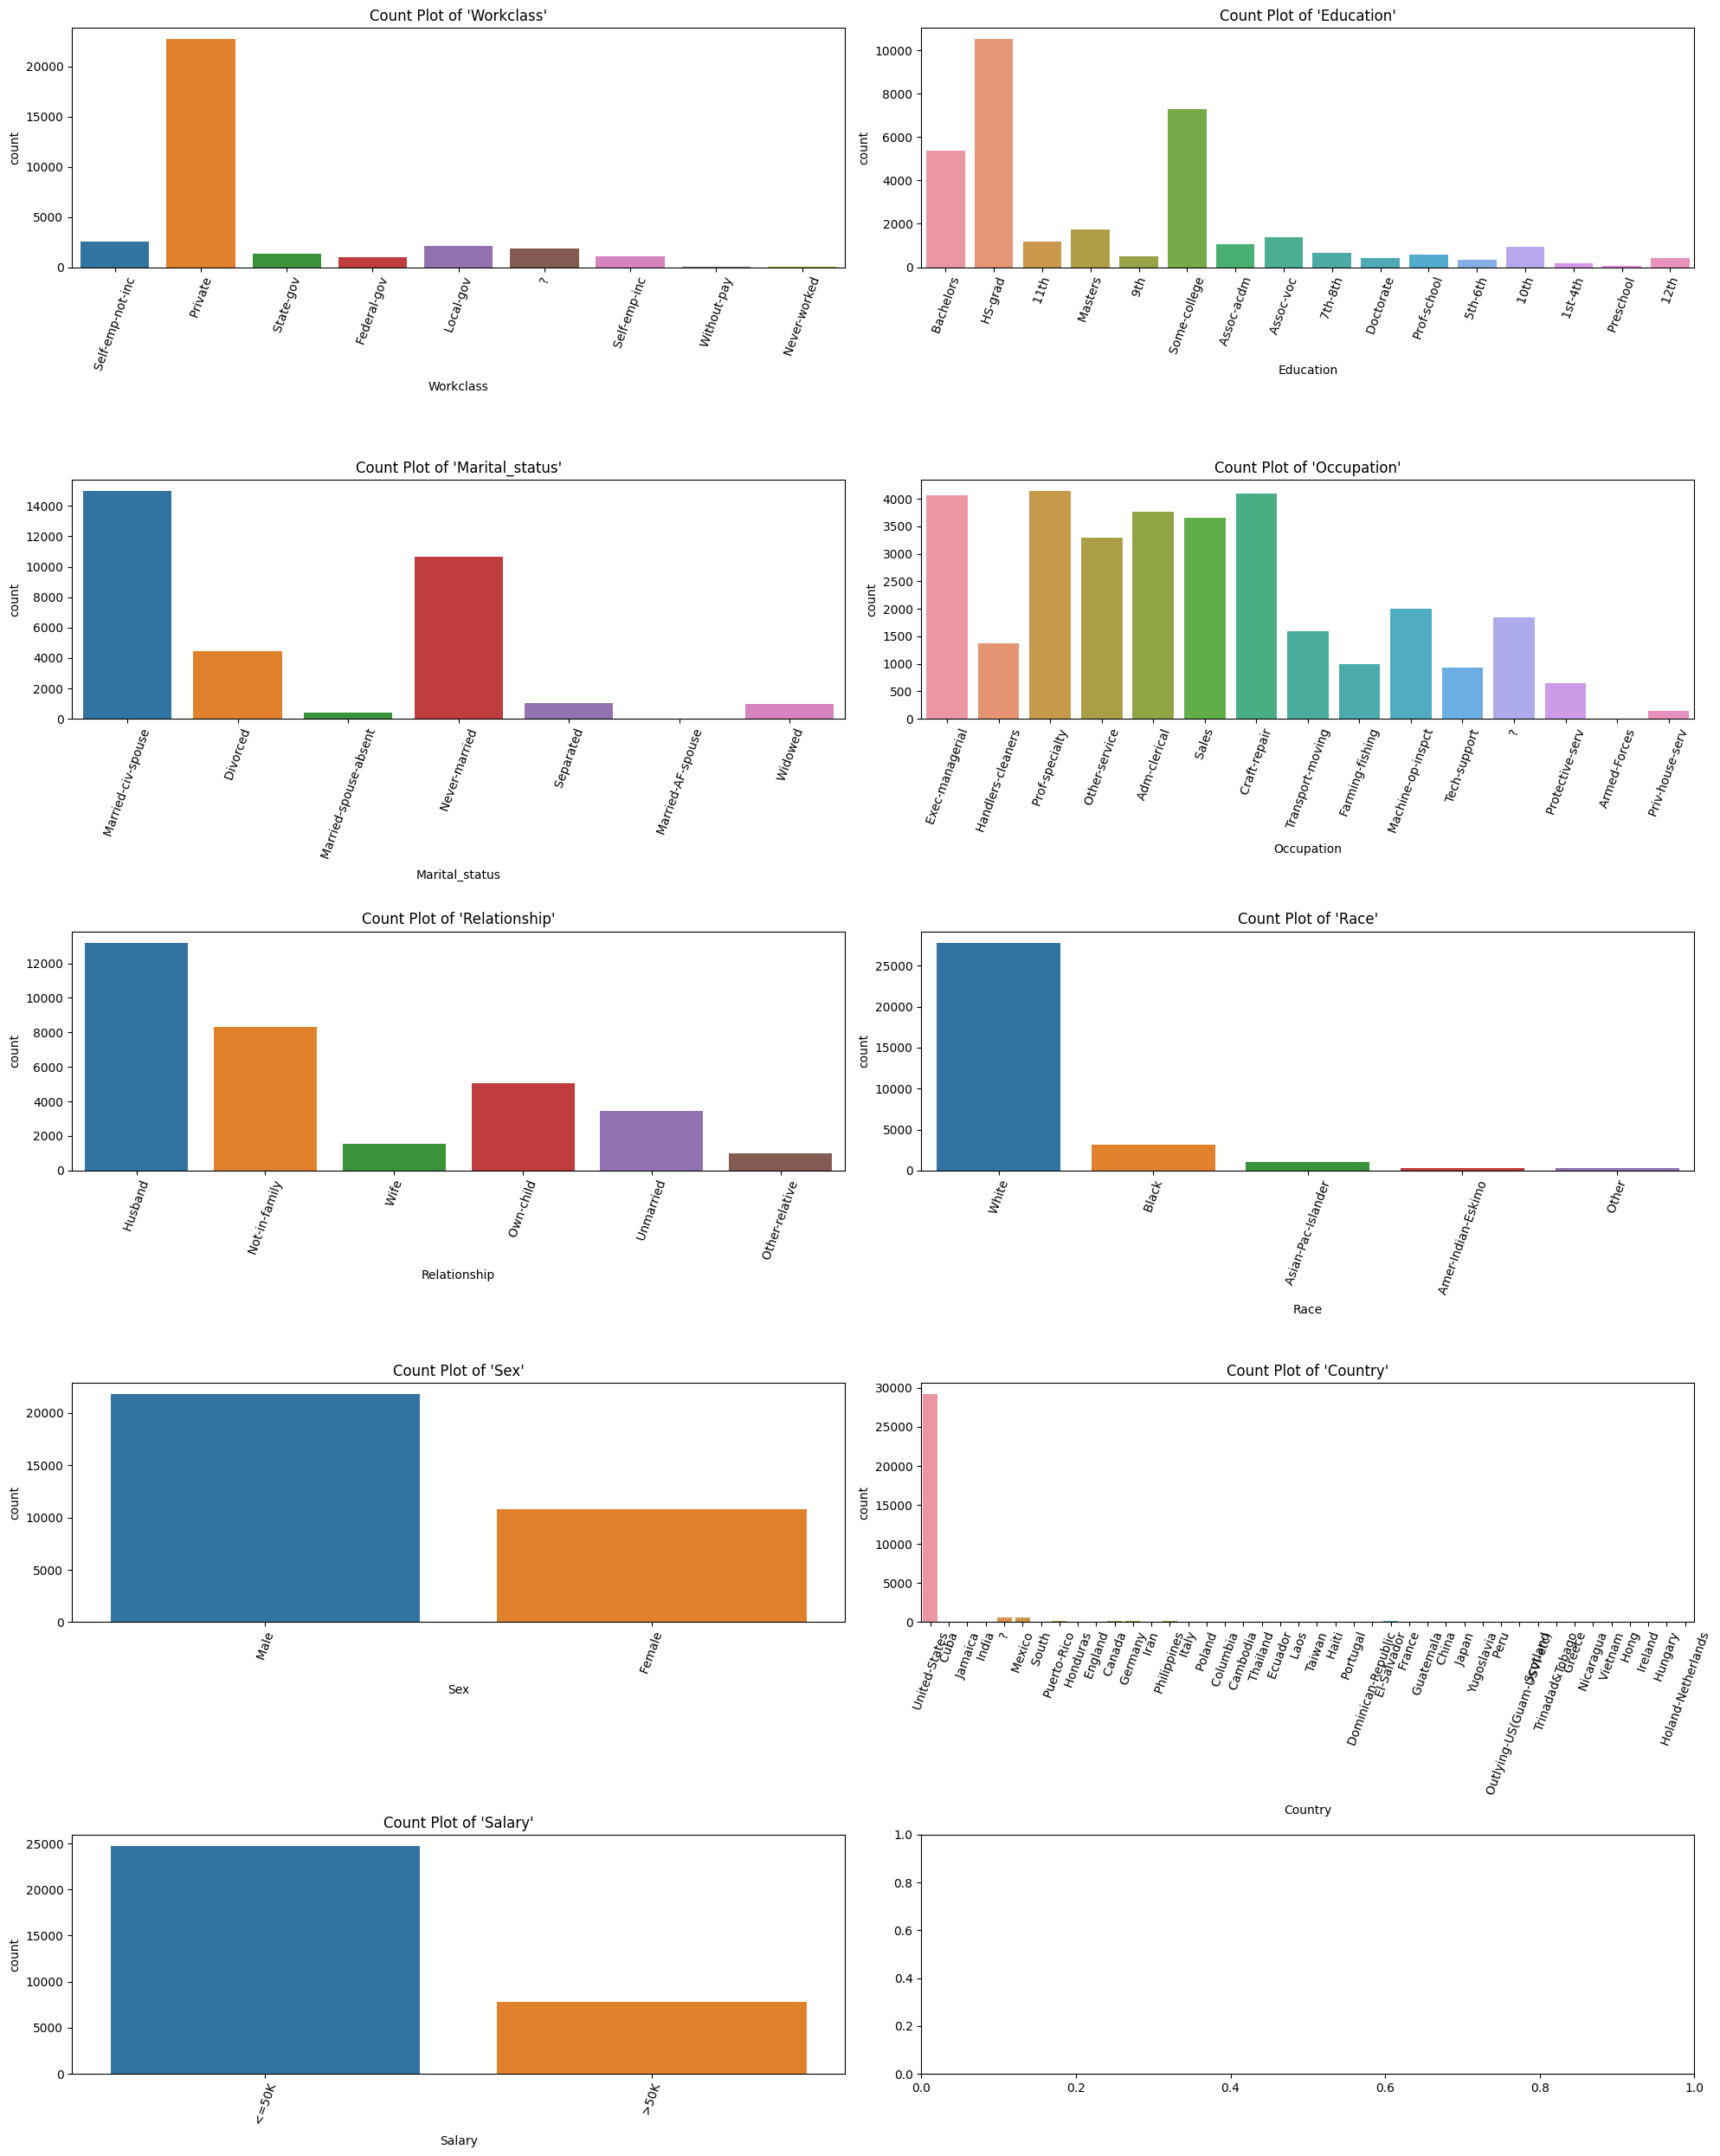

In [20]:
# To view the plot
plot_(
    data=cat_data, features=cat_data.columns, rows_num=5, cols_num=2, figsize=(20, 25)
)

In [21]:
cat_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [22]:
vars_to_drop = ["Marital_status", "Relationship", "Education_num", ]
data.drop(columns=vars_to_drop, inplace=True)

data.shape

(32560, 12)

In [23]:
RANDOMSTATE = 123
TESTSIZE = 0.2
TARGET = "Salary"

# Independent variable (matrix)
X = data.drop(columns=TARGET)

# Target variable (Vector)
y = data[TARGET]

# Split X & y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TESTSIZE, random_state=RANDOMSTATE)

#Shape: Train, Test
print(f"'Independent feature':{X_train.shape}, {X_test.shape}, \n'Target features:' {y_train.shape}, {y_test.shape}")

'Independent feature':(26048, 11), (6512, 11), 
'Target features:' (26048,), (6512,)


In [27]:
# Scaling and encoding the data variables

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

To_scale = [
    "Age",
    "Final_weight",
    "Capital_gain",
    "Capital_loss",
    "Hours_per_week",
]

To_encode = [
    "Workclass",
    "Education",
    "Occupation",
    "Race",
    "Sex",
    "Country"]

# Applying one hot encoder
OHE = OneHotEncoder(dtype=int, handle_unknown="ignore")

# Scale
Scaler = MinMaxScaler()


col_transformer = ColumnTransformer(
    transformers=[("OHE", OHE, To_encode), ("Scaler", Scaler, To_scale)],
     remainder="passthrough"
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Workclass', 'Education', 'Occupation',
                                  'Race', 'Sex', 'Country']),
                                ('Scaler', MinMaxScaler(),
                                 ['Age', 'Final_weight', 'Capital_gain',
                                  'Capital_loss', 'Hours_per_week'])])

In [29]:
transformed = col_transformer.fit_transform(X_train)
transformed = transformed.toarray()

transformed_data =pd.DataFrame(transformed, columns=col_transformer.get_feature_names_out())
transformed_data.head()

,OHE__Workclass_ ?,OHE__Workclass_ Federal-gov,OHE__Workclass_ Local-gov,OHE__Workclass_ Never-worked,OHE__Workclass_ Private,OHE__Workclass_ Self-emp-inc,OHE__Workclass_ Self-emp-not-inc,OHE__Workclass_ State-gov,OHE__Workclass_ Without-pay,OHE__Education_ 10th,OHE__Education_ 11th,OHE__Education_ 12th,OHE__Education_ 1st-4th,OHE__Education_ 5th-6th,OHE__Education_ 7th-8th,OHE__Education_ 9th,OHE__Education_ Assoc-acdm,OHE__Education_ Assoc-voc,OHE__Education_ Bachelors,OHE__Education_ Doctorate,OHE__Education_ HS-grad,OHE__Education_ Masters,OHE__Education_ Preschool,OHE__Education_ Prof-school,OHE__Education_ Some-college,OHE__Occupation_ ?,OHE__Occupation_ Adm-clerical,OHE__Occupation_ Armed-Forces,OHE__Occupation_ Craft-repair,OHE__Occupation_ Exec-managerial,OHE__Occupation_ Farming-fishing,OHE__Occupation_ Handlers-cleaners,OHE__Occupation_ Machine-op-inspct,OHE__Occupation_ Other-service,OHE__Occupation_ Priv-house-serv,OHE__Occupation_ Prof-specialty,OHE__Occupation_ Protective-serv,OHE__Occupation_ Sales,OHE__Occupation_ Tech-support,OHE__Occupation_ Transport-moving,OHE__Race_ Amer-Indian-Eskimo,OHE__Race_ Asian-Pac-Islander,OHE__Race_ Black,OHE__Race_ Other,OHE__Race_ White,OHE__Sex_ Female,OHE__Sex_ Male,OHE__Country_ ?,OHE__Country_ Cambodia,OHE__Country_ Canada,OHE__Country_ China,OHE__Country_ Columbia,OHE__Country_ Cuba,OHE__Country_ Dominican-Republic,OHE__Country_ Ecuador,OHE__Country_ El-Salvador,OHE__Country_ England,OHE__Country_ France,OHE__Country_ Germany,OHE__Country_ Greece,OHE__Country_ Guatemala,OHE__Country_ Haiti,OHE__Country_ Holand-Netherlands,OHE__Country_ Honduras,OHE__Country_ Hong,OHE__Country_ Hungary,OHE__Country_ India,OHE__Country_ Iran,OHE__Country_ Ireland,OHE__Country_ Italy,OHE__Country_ Jamaica,OHE__Country_ Japan,OHE__Country_ Laos,OHE__Country_ Mexico,OHE__Country_ Nicaragua,OHE__Country_ Outlying-US(Guam-USVI-etc),OHE__Country_ Peru,OHE__Country_ Philippines,OHE__Country_ Poland,OHE__Country_ Portugal,OHE__Country_ Puerto-Rico,OHE__Country_ Scotland,OHE__Country_ South,OHE__Country_ Taiwan,OHE__Country_ Thailand,OHE__Country_ Trinadad&Tobago,OHE__Country_ United-States,OHE__Country_ Vietnam,OHE__Country_ Yugoslavia,Scaler__Age,Scaler__Final_weight,Scaler__Capital_gain,Scaler__Capital_loss,Scaler__Hours_per_week
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.041096,0.106341,0.0,0.0,0.193878
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.068493,0.175324,0.0,0.0,0.397959
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260274,0.267151,0.0,0.0,0.346939
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.068493,0.026386,0.0,0.0,0.602041
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [49]:
# Initializing

from sklearn.linear_model import LogisticRegression


logit = LogisticRegression(random_state=RANDOMSTATE, max_iter=200)

pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("logit", logit),
    ]
)

pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Occupation', 'Race', 'Sex',
                                                   'Country']),
                                                 ('Scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week'])])),
                ('logit', LogisticRegression(max_iter=200, random_state=123))])

In [50]:
# Fit
pipe_logit.fit(X_train, y_train)

# Make predictions
y_pred_1 = pipe_logit.predict(X_test)

# Probability of Surviving
y_proba_1 = pipe_logit.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Checking for Accuracy

np.mean(y_test == y_pred_1)

0.8333845208845209

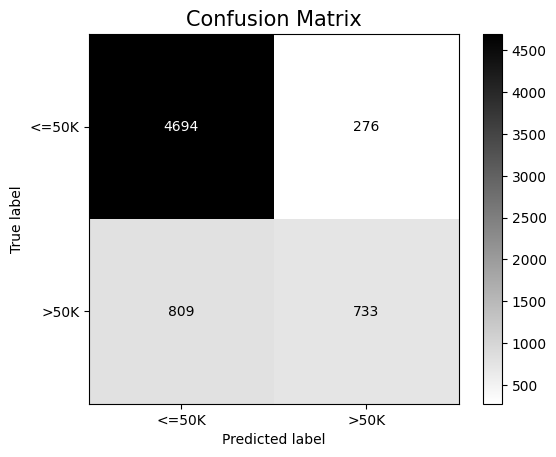

In [37]:
# Using a confusion matrix for classification matrix

# Evaluate Model
labels = ["<=50K", ">50K"]


conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_1)
conf_matrix

disp = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=labels)

# Display Confusion Matix
disp.plot(cmap=plt.cm.gray_r)
plt.title("Confusion Matrix", size=15)
plt.show()

In [57]:
# Classification report

clf_report = metrics.classification_report(y_test, y_pred_1)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.90      4970
        >50K       0.72      0.47      0.57      1542

    accuracy                           0.83      6512
   macro avg       0.79      0.71      0.73      6512
weighted avg       0.82      0.83      0.82      6512



In [39]:
y_test.value_counts(normalize=True)

 <=50K    0.763206
 >50K     0.236794
Name: Salary, dtype: float64

In [43]:
# Model 1

auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_proba_1)
auc_score

0.8637465519446119

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


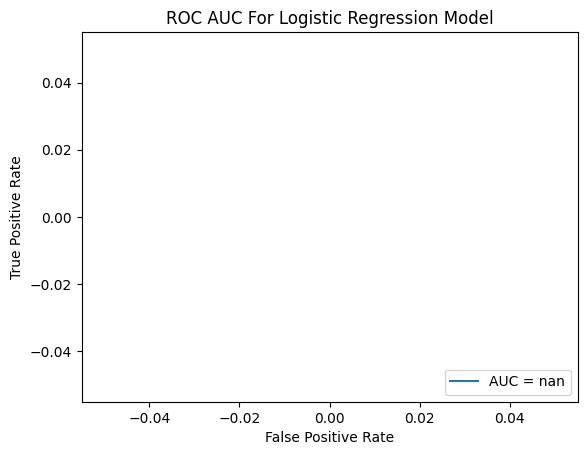

In [51]:
# # Plotting a Receiver Operator Characteristic curve

fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_test, y_score=y_proba_1, pos_label=">50K"
)

auc_score = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

In [53]:
#Making a decision tree

from sklearn.tree import DecisionTreeClassifier

# Initializing
logit = LogisticRegression(random_state=RANDOMSTATE)

# Pipeline
pipe_dec_tree = Pipeline(
    steps=[
        # Column Transformer
        ("col_transformer", col_transformer),
        # log Model
        ("logit", DecisionTreeClassifier(random_state=RANDOMSTATE)),
    ]
)

pipe_dec_tree

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Occupation', 'Race', 'Sex',
                                                   'Country']),
                                                 ('Scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week'])])),
                ('logit', DecisionTreeClassifier(random_state=123))])

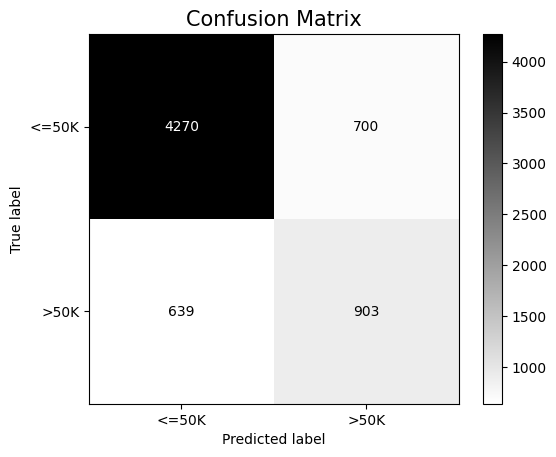

In [61]:
# Fit 
pipe_dec_tree.fit(X_train, y_train)

# Predict
y_pred_2 = pipe_dec_tree.predict(X_test)

# Probability
y_proba_2 = pipe_dec_tree.predict_proba(X_test)[:, 1]

# Applying the Confusion matix
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_2)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Show confusion matix
disp.plot(cmap=plt.cm.gray_r)
plt.title("Confusion Matrix", size=15)
plt.show()

In [58]:
# Classification report

clf_report = metrics.classification_report(y_test, y_pred_2)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.87      0.86      0.86      4970
        >50K       0.56      0.59      0.57      1542

    accuracy                           0.79      6512
   macro avg       0.72      0.72      0.72      6512
weighted avg       0.80      0.79      0.80      6512



In [62]:
# Second model

auc_score_2 = metrics.roc_auc_score(y_true=y_test, y_score=y_proba_2)
auc_score_2

0.7225742261611172

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


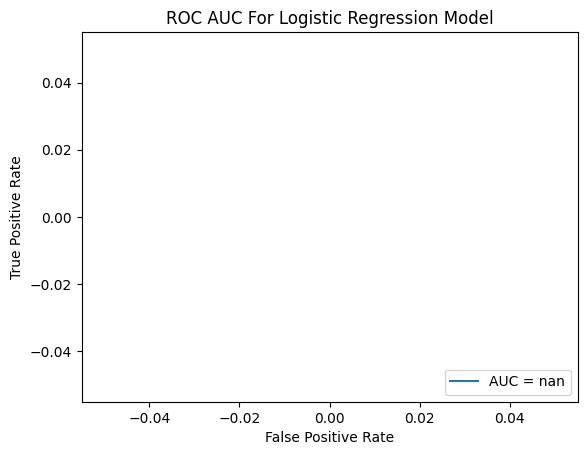

In [69]:
# Plotting a Receiver Operator Characteristic curve

fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_test, y_score=y_proba_2, pos_label=">50K"
)

auc_score_2 = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_2, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

In [74]:
# Using a sample data to simulate the salary 

sample_data = {
    "Age": 32,
    "Workclass": "Self-emp-not-inc",
    "Final_weight": 270599,
    "Education": "Bachelors",
    "Occupation": "Tech-support",
    "Race": "Exec-White",
    "Sex": "Male",
    "Capital_gain": 0,
    "Capital_loss": 0,
    "Hours_per_week": 34,
    "Country": "United-States",
}

new_data = pd.DataFrame(data=sample_data, index=[0])
new_data.head()

,Age,Workclass,Final_weight,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,32,Self-emp-not-inc,270599,Bachelors,Tech-support,Exec-White,Male,0,0,34,United-States


In [75]:
# Using Logit Regression to get the actual simualtion
result = pipe_logit.predict(new_data)[0]
result

' <=50K'